# Week_3
### 將資料分組後做視覺化分析
1. 取出需要的資料並對資料進行分類處理
2. 將資料依照時間作圖判斷資料趨勢

##### 匯入需要的函式庫

In [1]:
#import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
from func import *
%matplotlib inline

##### 觀察資料，尋找需要的資料

In [2]:
data = pd.read_csv(r'../../NTU_大數據與商業分析Datasets/Orders.csv', nrows = 2).T
data

,0,1
DateId,20150703,20150703
MemberId,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web
TrackDeviceTypeDef,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778
SalePageId,1242871,1242880
IsMajor,True,True
IsGift,False,False


##### 匯入需要的資料群

In [3]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', index_col = False, 
                   usecols = ['DateId', 'MemberId', 'IsMajor', 'PromotionDiscount', 'ECouponDiscount', 'SalesOrderSlaveTotalPayment', 'ReturnGoodsDateId'])
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId
0,20150703,1388133,True,0.0,0.0,350.0,NaN
1,20150703,1388133,True,0.0,0.0,199.0,NaN
2,20150703,1388133,True,0.0,0.0,199.0,NaN
3,20150703,1388133,True,0.0,0.0,225.0,NaN
4,20150703,365787,True,0.0,0.0,100.0,NaN


##### 資料預處理
* 除去退貨、非主件(贈品、送禮等)資料

In [4]:
data.drop(data[(~data.ReturnGoodsDateId.isna())|(data.IsMajor==False)].index,
          axis = 0, inplace = True)
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId
0,20150703,1388133,True,0.0,0.0,350.0,NaN
1,20150703,1388133,True,0.0,0.0,199.0,NaN
2,20150703,1388133,True,0.0,0.0,199.0,NaN
3,20150703,1388133,True,0.0,0.0,225.0,NaN
4,20150703,365787,True,0.0,0.0,100.0,NaN


* 確認資料是否有折扣(Discount:PromotionDiscount/ECouponDiscount)

In [5]:
data['Discount'] = (data.PromotionDiscount!=0)|(data.ECouponDiscount!=0)
data['Date_D'] = pd.to_datetime(data.DateId.astype('int'), format = '%Y%m%d')
data['Date_M'] = data['Date_D'].dt.to_period('M')
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId,Discount,Date_D,Date_M
0,20150703,1388133,True,0.0,0.0,350.0,NaN,False,2015-07-03,2015-07
1,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03,2015-07
2,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03,2015-07
3,20150703,1388133,True,0.0,0.0,225.0,NaN,False,2015-07-03,2015-07
4,20150703,365787,True,0.0,0.0,100.0,NaN,False,2015-07-03,2015-07


* 確認使用者是否只出現一次（僅消費一次）

In [6]:
data['Once'] = (data.groupby('MemberId')['MemberId'].transform('value_counts') == 1)
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId,Discount,Date_D,Date_M,Once
0,20150703,1388133,True,0.0,0.0,350.0,NaN,False,2015-07-03,2015-07,False
1,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03,2015-07,False
2,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03,2015-07,False
3,20150703,1388133,True,0.0,0.0,225.0,NaN,False,2015-07-03,2015-07,False
4,20150703,365787,True,0.0,0.0,100.0,NaN,False,2015-07-03,2015-07,False


* 將預處理所用到的資料移除，留下所需要的資料集

In [7]:
data.drop(axis = 1, inplace = True,
    labels = ['MemberId', 'DateId', 'IsMajor', 'PromotionDiscount', 'ECouponDiscount','ReturnGoodsDateId'])
data.head()

,SalesOrderSlaveTotalPayment,Discount,Date_D,Date_M,Once
0,350.0,False,2015-07-03,2015-07,False
1,199.0,False,2015-07-03,2015-07,False
2,199.0,False,2015-07-03,2015-07,False
3,225.0,False,2015-07-03,2015-07,False
4,100.0,False,2015-07-03,2015-07,False


##### 進行分組並分析其內資訊
* 觀察各組所貢獻之總銷售額

In [8]:
statistic = pd.DataFrame(data.groupby(['Once', 'Discount'])['SalesOrderSlaveTotalPayment'].sum())
statistic['Percentage (%)'] = statistic.SalesOrderSlaveTotalPayment/statistic.SalesOrderSlaveTotalPayment.sum()*100
statistic

SalesOrderSlaveTotalPayment  Percentage (%)
Once  Discount                                             
False False                     452116948.0       36.989228
      True                      756168857.0       61.864750
True  False                      10677724.0        0.873581
      True                        3330037.0        0.272442

* 將上述數據視覺化

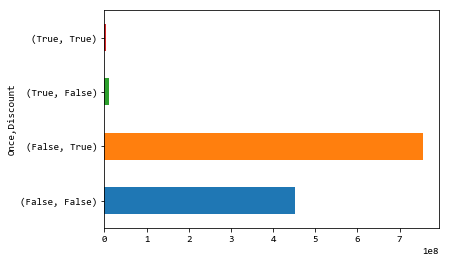

In [9]:
data.groupby(['Once', 'Discount'])['SalesOrderSlaveTotalPayment'].sum().plot.barh()

* 依照時間(日)繪製不同類別的動態趨勢

Text(0.5,1,'Time(Day) v.s. Group Payment')

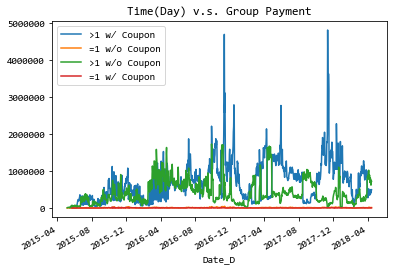

In [10]:
group = data.groupby(['Once', 'Discount'])
leg = []
mp = {(False, False) : '>1 w/o Coupon', (False, True) : '>1 w/ Coupon', 
     (True, False) : '=1 w/o Coupon', (True, True) : '=1 w/ Coupon'}
for gp in group.groups:
    pic = group.get_group(gp).groupby('Date_D')['SalesOrderSlaveTotalPayment'].sum().plot()
    leg.append(mp[gp])
pic.legend(leg)
pic.set_title('Time(Day) v.s. Group Payment')

##### 與上次所得之 CPI, WPI 資料合併做處理
* 尋找所需要查到的最舊日期

In [11]:
latestDate = data.Date_M.min()
latestDate

Period('2015-05', 'M')

* 取得 CPI, WPI 資料

In [12]:
CPI = getCPI(str(latestDate.year)+'-'+str(latestDate.month).zfill(2))
CPI.Year = CPI.Year + 1911
CPI.head()

,Year,Month,CPI (%),WPI (%)
0,2018,8,1.53,6.83
1,2018,7,1.75,7.02
2,2018,6,1.31,6.65
3,2018,5,1.64,5.61
4,2018,4,1.98,2.53


* 將日期資料轉為時間標籤

In [13]:
CPI['Date'] = (CPI.Year*100 + CPI.Month).apply(pd.to_datetime, format='%Y%m').dt.to_period('M')
CPI.drop(labels = ['Year', 'Month'], axis = 1, inplace = True)
CPI.head()

,CPI (%),WPI (%),Date
0,1.53,6.83,2018-08
1,1.75,7.02,2018-07
2,1.31,6.65,2018-06
3,1.64,5.61,2018-05
4,1.98,2.53,2018-04


Text(0.5,1,'Time(Month) v.s. Group Payment')

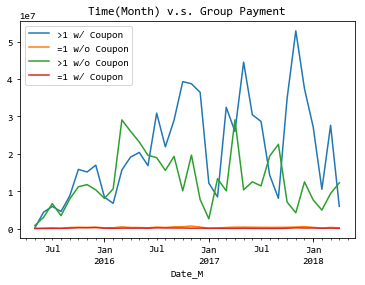

In [14]:
#data['Date'] = pd.to_datetime(data['Date'].astype('int'), unit = 'd')
#data
leg = []
for gp in group.groups:
    pic = group.get_group(gp).groupby('Date_M')['SalesOrderSlaveTotalPayment'].sum().plot()
    leg.append(mp[gp])
pic.legend(leg)
pic.set_title('Time(Month) v.s. Group Payment')